## MCP for Finance - Stock Researcher Agent

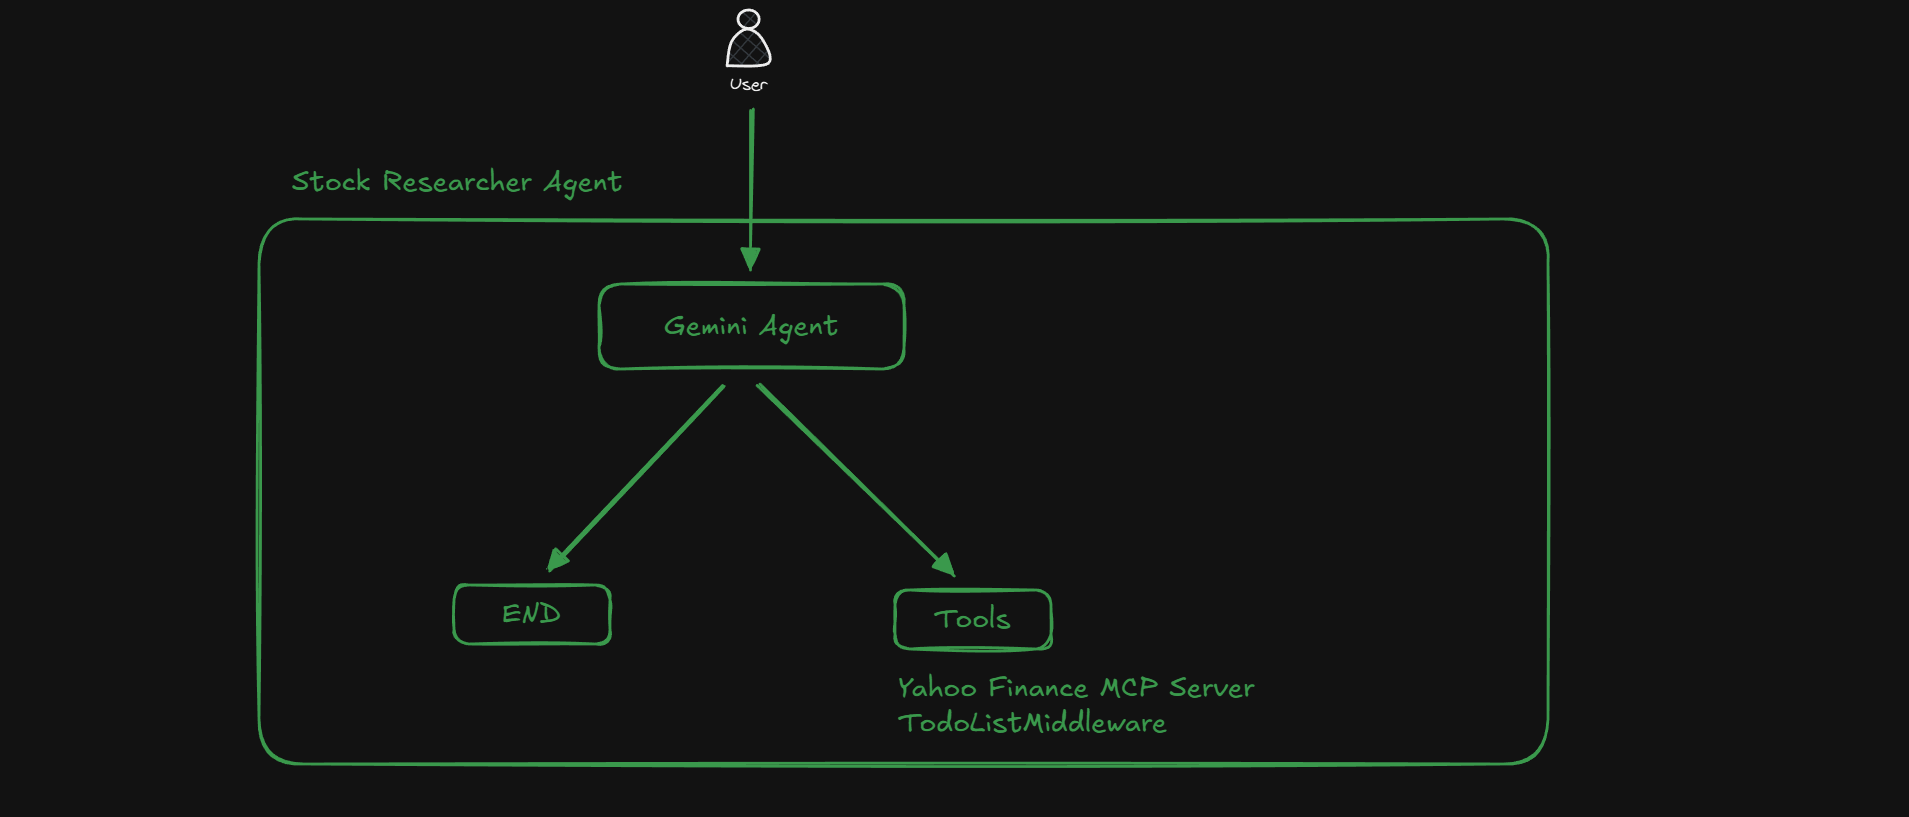
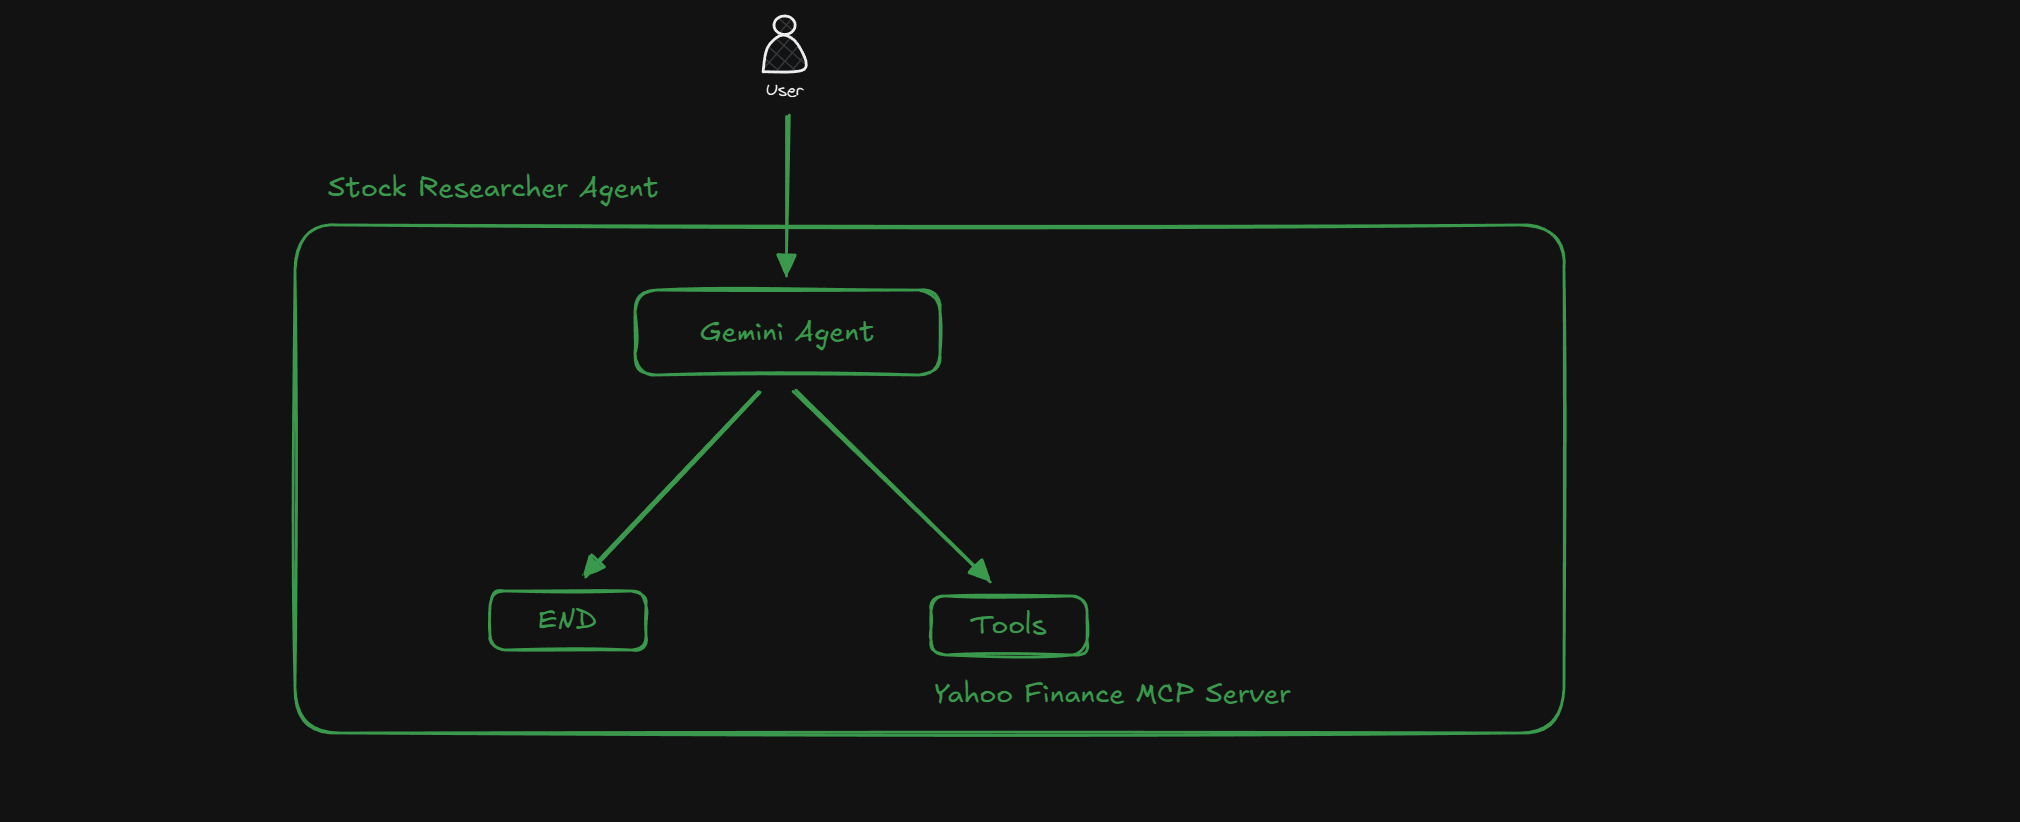

### Yahoo Finance Research Tool

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from dotenv import load_dotenv
load_dotenv()

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain.agents.middleware import TodoListMiddleware
from langchain_core.messages import HumanMessage
from langchain_core.tools import tool

import subprocess
import sys

In [ ]:
@tool
def finance_research(query):
    """Research stocks using Yahoo Finance MCP async function."""

    code = f"""
import asyncio
from yahoo_mcp import finance_research
asyncio.run(finance_research("{query}"))
"""
    
    result = subprocess.run([sys.executable, '-c', code], capture_output=True, text=True)

    return result.stdout

In [ ]:
query = "What is the current stock price of Apple (AAPL)?"
response = finance_research.invoke({"query": query})

print(response)

### Stock Researcher Agent

#### System Prompt

In [ ]:
system_prompt = """You are a professional stock research analyst specializing in financial analysis.

**Your Responsibilities:**
1. Analyze stock performance and financial metrics
2. Research company fundamentals
3. Provide data-driven investment recommendations

**Analysis Framework:**
- Company name and ticker symbol
- Current stock price
- Key metrics: P/E ratio, Market Cap, Revenue
- Financial health assessment
- Clear recommendation: Buy, Hold, or Sell

**Important Guidelines:**
- Only respond to finance and stock market related questions
- For non-finance questions, politely decline: "I apologize, but I can only assist with stock market and financial analysis questions. Please ask me about stocks, companies, or financial metrics."
- Always cite specific data and metrics
- Maintain professional and objective tone

Provide concise, actionable insights for investors."""

#### Create Agent

In [ ]:
from langchain.agents.middleware import TodoListMiddleware

model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

agent = create_agent(
    model=model,
    tools=[finance_research],
    system_prompt=system_prompt,
    middleware=[TodoListMiddleware()]
)

#### Run Agent

In [ ]:
response = agent.invoke({"messages": [HumanMessage("What is the weather today?")]})
response
# print(response["messages"][-1].text)

In [ ]:
response = agent.invoke({"messages": [HumanMessage("Analyze Apple (AAPL) stock and its competitors like MSFT and Google. Present data clearly in the table.")]})

In [ ]:
response

In [ ]:
print(response["messages"][-1].text)